# Задача базового уровня

Загрузить изображение из интернета размера не меньше 640 x 480 пикселей. 
Преобразовать изображение в градации серого. выполнить линейное контрастирование полученного изображения, удалив 20% самых темных и самых светлых пикселей. 
отобразить результат преобразований.

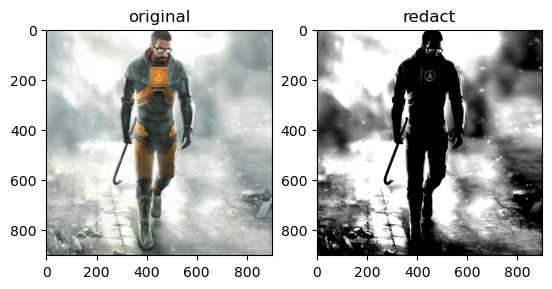

In [1]:
import urllib.request
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_url = "https://static.wikia.nocookie.net/protagonist/images/8/80/%D0%93%D0%BE%D1%80%D0%B4%D0%BE%D0%BD_%D0%A4%D1%80%D0%B8%D0%BC%D0%B5%D0%BD.jpg/revision/latest?cb=20191014111009&path-prefix=ru"

req = urllib.request.urlopen(image_url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
image = cv2.imdecode(arr, -1)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

flat_image = gray_image.flatten()
sorted_pixels = np.sort(flat_image)
num_pixels = len(sorted_pixels)
remove_pixels = int(num_pixels * 0.2)
contrast_image = gray_image.copy()
contrast_image[contrast_image < sorted_pixels[remove_pixels]] = sorted_pixels[remove_pixels]
contrast_image[contrast_image > sorted_pixels[num_pixels - remove_pixels - 1]] = sorted_pixels[num_pixels - remove_pixels - 1]

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("original")

plt.subplot(1, 2, 2)
plt.imshow(contrast_image, cmap='gray')
plt.title("redact")

plt.show()
